In [2]:
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt  

data01 = sio.loadmat('./datasets/2015_BOE_Chiu/Subject_01.mat')

images = data01['images']
automaticLayersDME = data01['automaticLayersDME']
automaticLayersNormal = data01['automaticLayersNormal']
automaticFluidDME = data01['automaticFluidDME']
manualFluid1 = data01['manualFluid1']
manualFluid2 = data01['manualFluid2']
manualLayers1 = data01['manualLayers1']
manualLayers2 = data01['manualLayers2']

images no.0


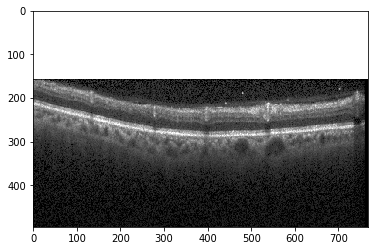

images no.1


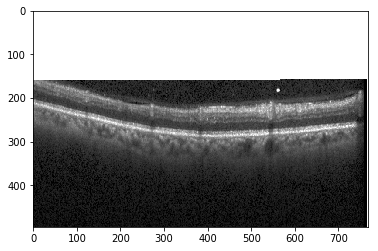

images no.2


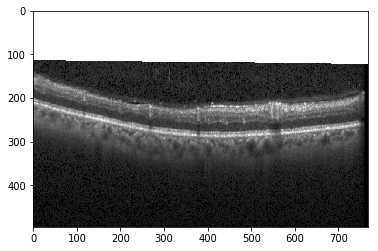

images no.3


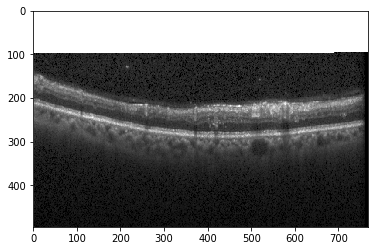

images no.4


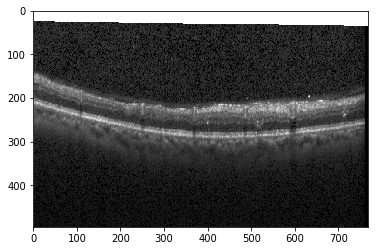

images no.5


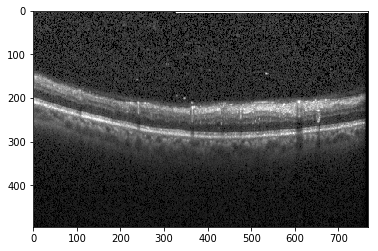

images no.6


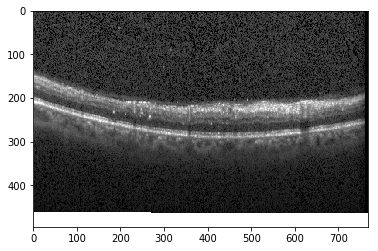

images no.7


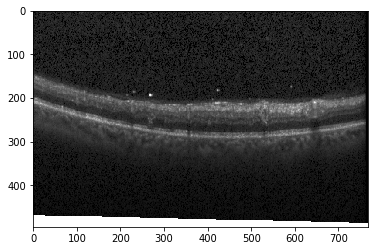

images no.8


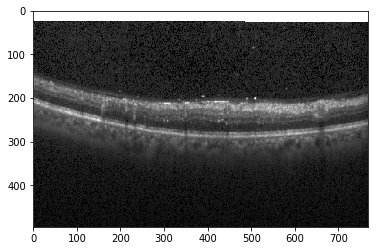

images no.9


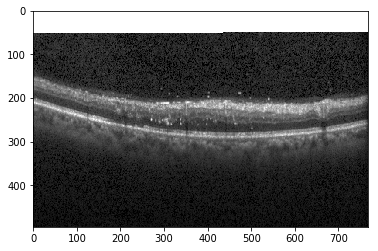

images no.10


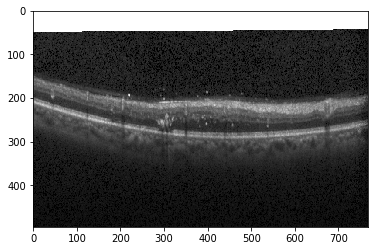

images no.11


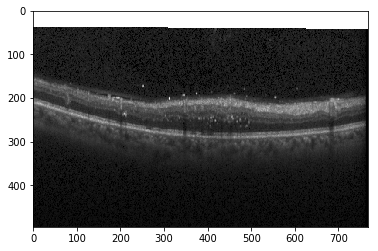

images no.12


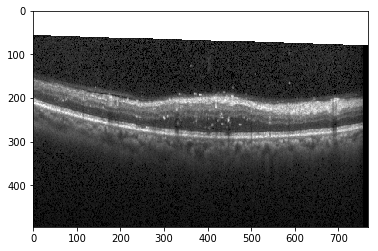

images no.13


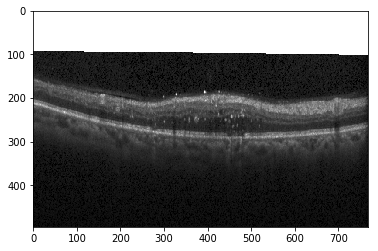

images no.14


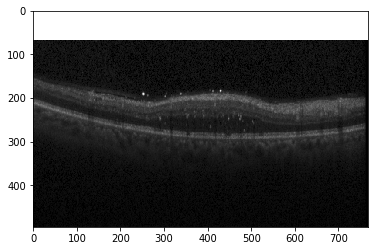

images no.15


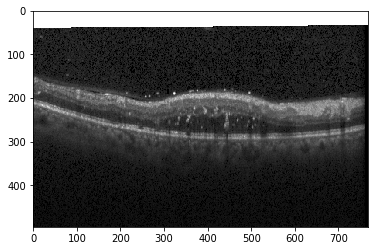

images no.16


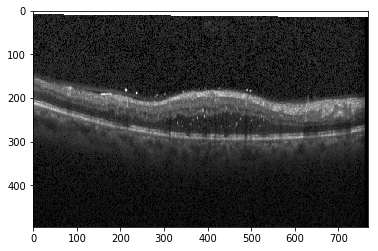

images no.17


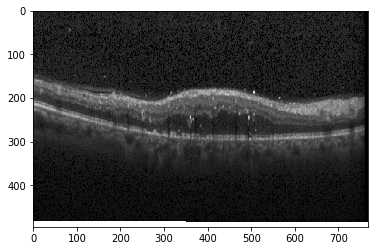

images no.18


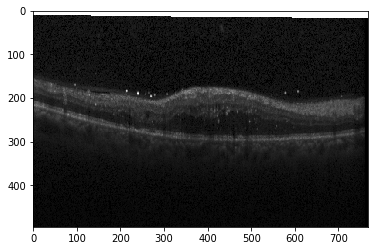

images no.19


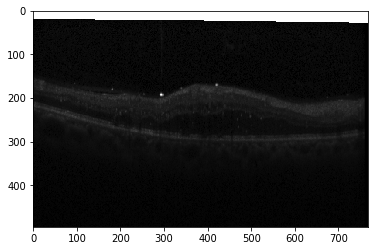

images no.20


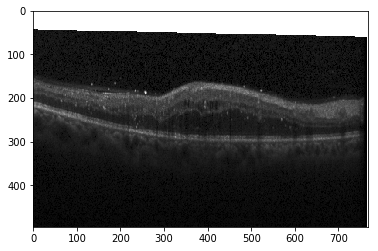

images no.21


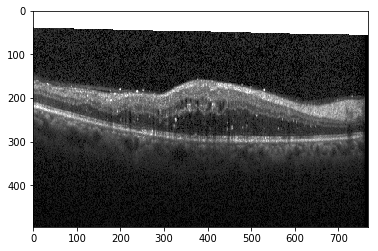

images no.22


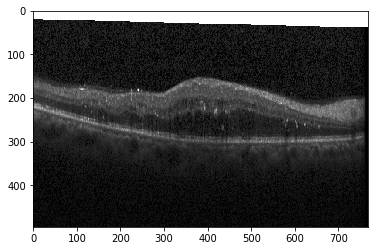

images no.23


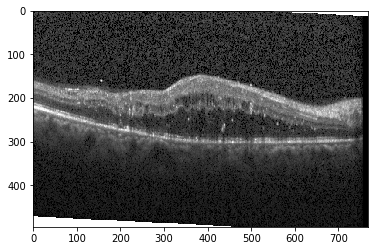

images no.24


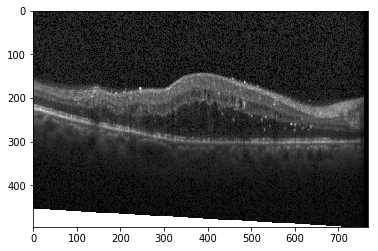

images no.25


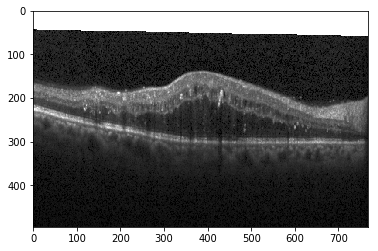

images no.26


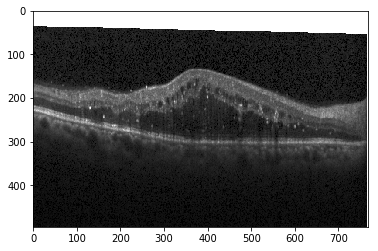

images no.27


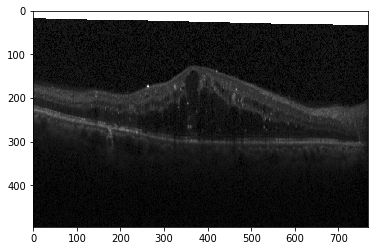

images no.28


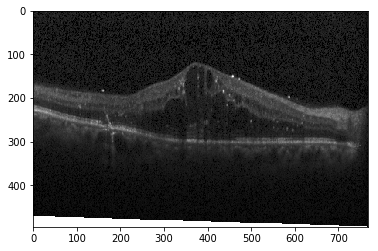

images no.29


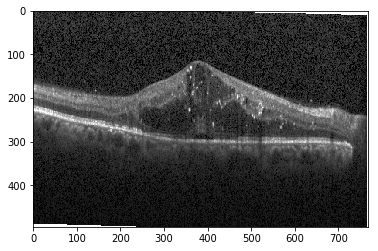

images no.30


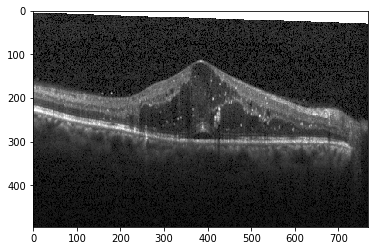

images no.31


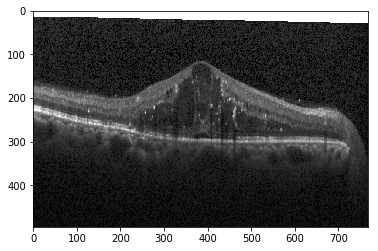

images no.32


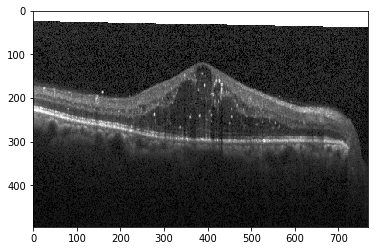

images no.33


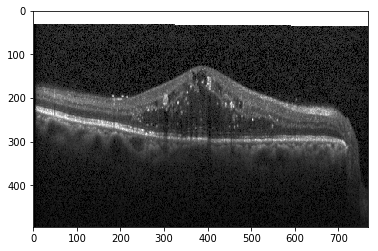

images no.34


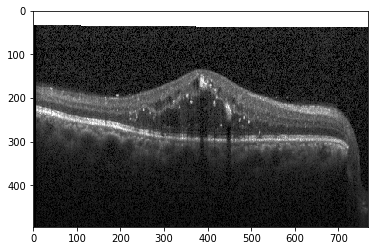

images no.35


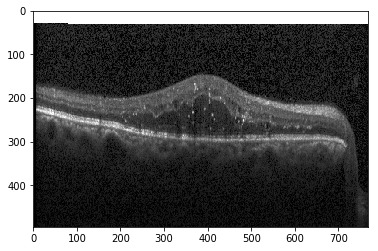

images no.36


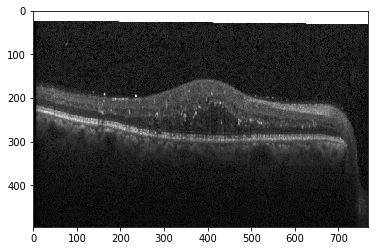

images no.37


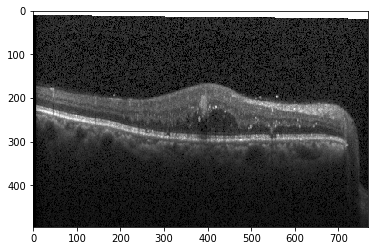

images no.38


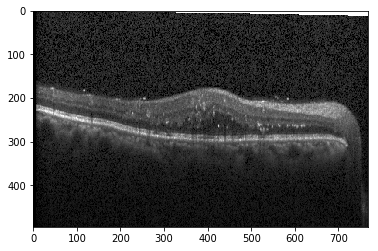

images no.39


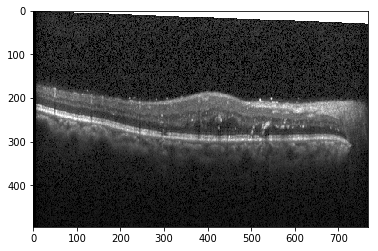

images no.40


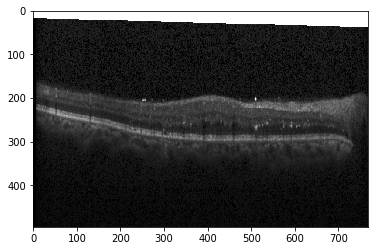

images no.41


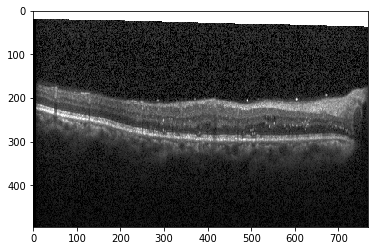

images no.42


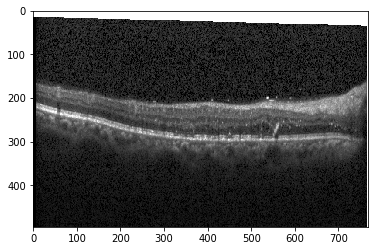

images no.43


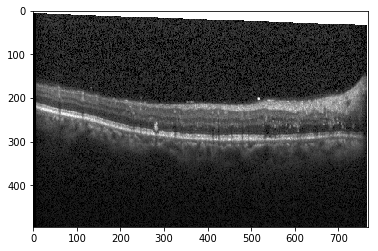

images no.44


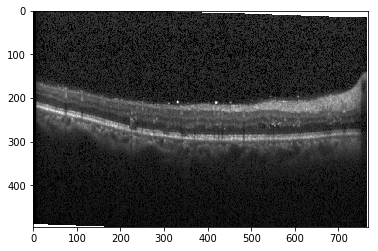

images no.45


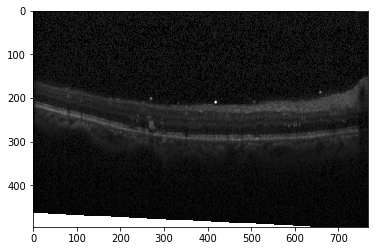

images no.46


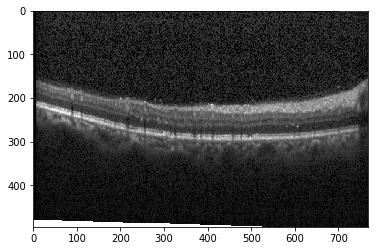

images no.47


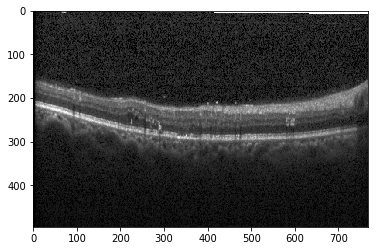

images no.48


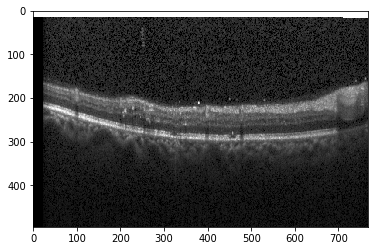

images no.49


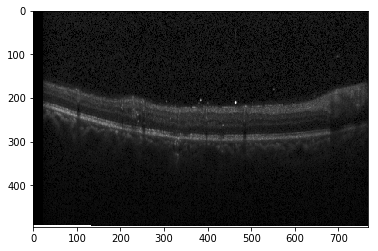

images no.50


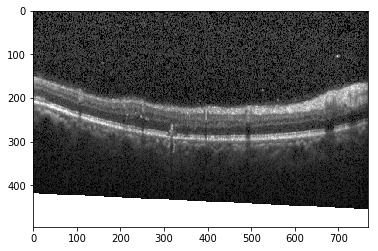

images no.51


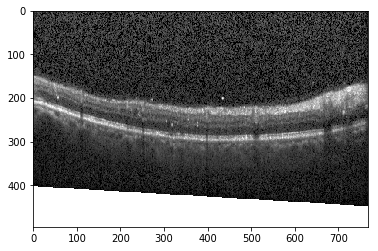

images no.52


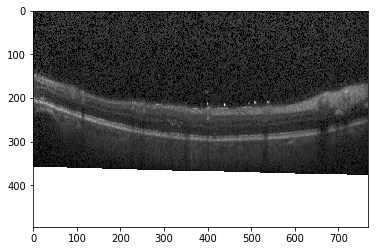

images no.53


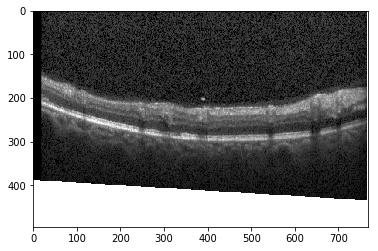

images no.54


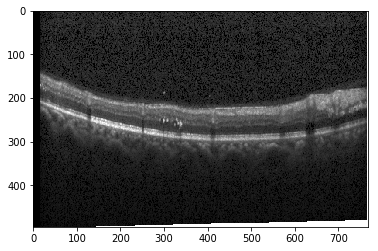

images no.55


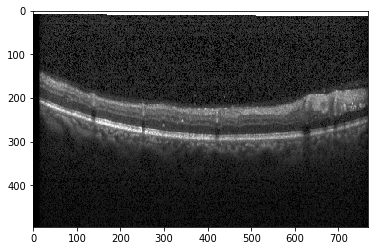

images no.56


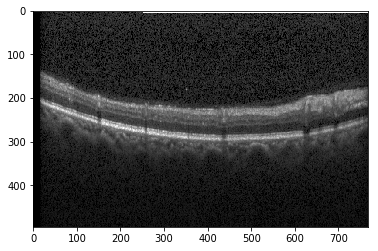

images no.57


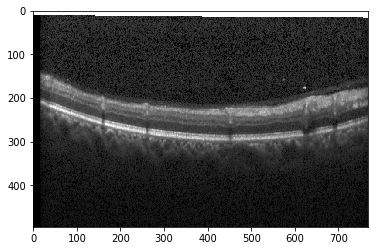

images no.58


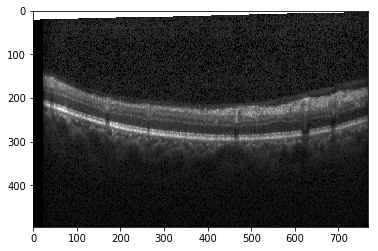

images no.59


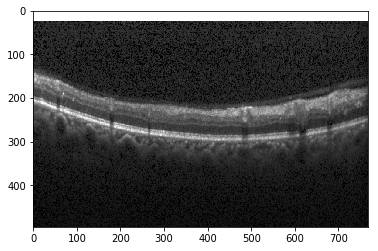

images no.60


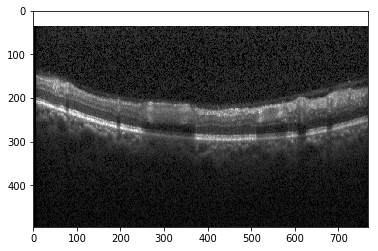

In [18]:
images = np.array(images,dtype=np.uint8)
w,h,c = images.shape;
#print(images.shape)
for i in range(0,61):
    print("images no." + str(i));
    plt.imshow(images[:,:,i],cmap=plt.cm.gray)
    plt.show()

In [3]:
manualFluid1 = np.array(manualFluid1,dtype=np.uint8)
print(manualFluid1.shape)

(496, 768, 61)


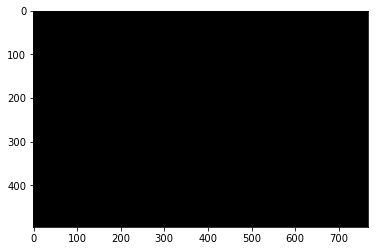

In [4]:
plt.imshow(manualFluid1[:,:,50],cmap=plt.cm.gray)
plt.show()

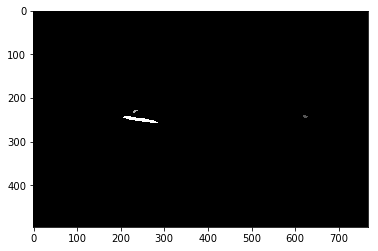

In [5]:
plt.imshow(manualFluid2[:,:,50],cmap=plt.cm.gray)
plt.show()

In [6]:
d = data01['manualLayers1']
idx = []
for i in range(0,61):
    temp = d[:,:,i]
    if not np.isnan(temp).all():
        idx.append(i)
print("valid label:")
print(idx)

valid label:
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]


In [7]:
images = np.array(images[:,:,idx])
automaticFluidDME = np.array(automaticFluidDME[:,:,idx])
automaticLayersDME = np.array(automaticLayersDME[:,:,idx])
automaticLayersNormal = np.array(automaticLayersNormal[:,:,idx])
manualFluid1 = np.array(manualFluid1[:,:,idx])
manualFluid2 = np.array(manualFluid2[:,:,idx])
manualLayers1 = np.array(manualLayers1[:,:,idx])
manualLayers2 = np.array(manualLayers2[:,:,idx])

In [8]:
def showDetail(id):
    print("images no." + str(id))
    plt.imshow(images[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("automaticFluidDME no." + str(id))
    plt.imshow(automaticFluidDME[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("automaticLayersDME no." + str(id))
    plt.imshow(automaticLayersDME[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("automaticLayersNormal no." + str(id))
    plt.imshow(automaticLayersNormal[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("manualFluid1 no." + str(id))
    plt.imshow(manualFluid1[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("manualFluid2 no." + str(id))
    plt.imshow(manualFluid2[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("manualLayers1 no." + str(id))
    plt.imshow(manualLayers1[:,:,id],cmap=plt.cm.gray) 
    plt.show()
    print("manualLayers2 no." + str(id))
    plt.imshow(manualLayers2[:,:,id],cmap=plt.cm.gray) 
    plt.show()

images no.5


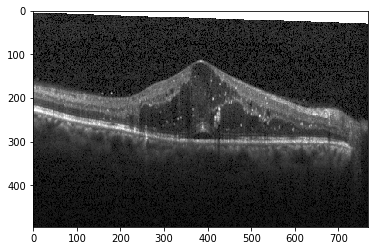

automaticFluidDME no.5


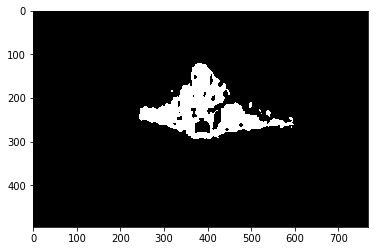

automaticLayersDME no.5


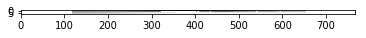

automaticLayersNormal no.5


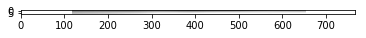

manualFluid1 no.5


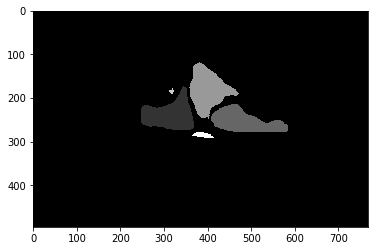

manualFluid2 no.5


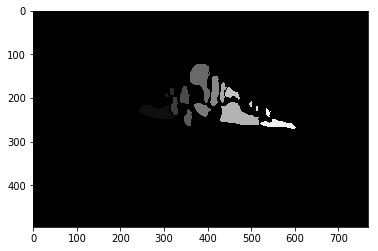

manualLayers1 no.5


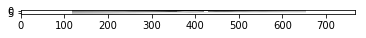

manualLayers2 no.5


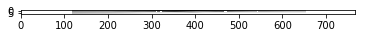

In [25]:
showDetail(5)

(496, 768, 3)
(496, 768, 3)


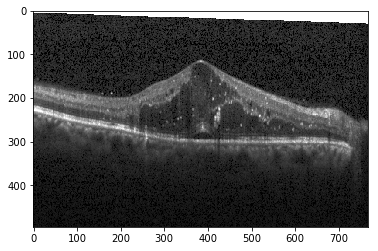

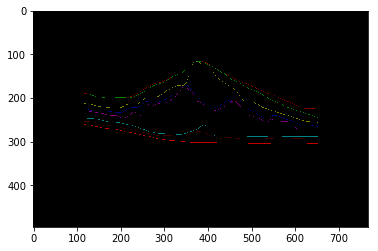

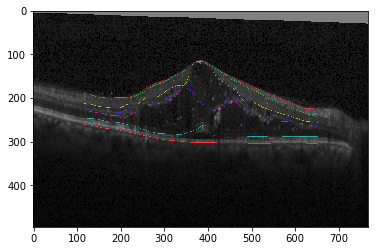

In [9]:
import cv2

color_map = [[128,0,0],[0,128,0],[128,128,0],[0,0,128],[128,0,128],[0,128,128],[64,0,0],[192,0,0]]
testImg = np.array(images[:,:,5],dtype=np.uint8)

testImg_rgb = np.zeros((496,768,3),dtype = np.uint8)
print(testImg_rgb.shape)
testImg_rgb[:,:,0] = testImg
testImg_rgb[:,:,1] = testImg
testImg_rgb[:,:,2] = testImg

print(testImg_rgb.shape) 
plt.imshow(testImg_rgb,cmap=plt.cm.gray)
plt.show()

layerMark = np.zeros_like(testImg_rgb)

manualLayer = np.array(manualLayers2[:,:,5],dtype=np.uint16)
h,w = manualLayer.shape
for i in range(0,h):
    for j in range(0,w):
        v = manualLayer[i,j]
        if v != 0:
            layerMark[v,j] = color_map[i]

manualLayer = np.array(manualLayer,dtype=np.uint8)
plt.imshow(layerMark)
plt.show()

merge_img = cv2.addWeighted(testImg_rgb,0.5,layerMark,1,0)
plt.imshow(merge_img)
plt.show()

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torch.autograd import Variable

data01 = sio.loadmat('./datasets/2015_BOE_Chiu/Subject_01.mat')

images = data01['images']
automaticFluidDME = data01['automaticFluidDME']
automaticLayersDME = data01['automaticLayersDME']
automaticLayersNormal = data01['automaticLayersNormal']
manualFluid1 = data01['manualFluid1']
manualFluid2 = data01['manualFluid2']
manualLayers1 = data01['manualLayers1']
manualLayers2 = data01['manualLayers2']

SEG_LABELS_LIST = [
    {"id": -1, "name": "void", "rgb_values": [0, 0, 0]},
    {"id": 0, "name": "Region above the retina (RaR)", "rgb_values": [128, 0, 0]},
    {"id": 1, "name": "ILM: Inner limiting membrane", "rgb_values": [0, 128, 0]},
    {"id": 2, "name": "NFL-IPL: Nerve fiber ending to Inner plexiform layer", "rgb_values": [128, 128, 0]},
    {"id": 3, "name": "INL: Inner Nuclear layer", "rgb_values": [0, 0, 128]},
    {"id": 4, "name": "OPL: Outer plexiform layer", "rgb_values": [128, 0, 128]},
    {"id": 5, "name": "ONL-ISM: Outer Nuclear layer to Inner segment myeloid", "rgb_values": [0, 128, 128]},
    {"id": 6, "name": "ISE: Inner segment ellipsoid", "rgb_values": [128, 128, 128]},
    {"id": 7, "name": "OS-RPE: Outer segment to Retinal pigment epithelium", "rgb_values": [64, 0, 0]},
    {"id": 8, "name": "Region below RPE (RbR)", "rgb_values": [192, 0, 0]}]


# {"id": 9, "name": "Fluid region", "rgb_values": [64, 128, 0]}];

def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1, 2, 0)
    for l in label_infos:
        mask =   label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)


relaynet_model =  torch.load('models/relaynet_good.model')
input_data = np.array(images[:,:,30],dtype=np.float).T
input_data = input_data.reshape((1,1,768,496))


out = relaynet_model(Variable(torch.Tensor(input_data).cuda(),volatile=True))
out = F.softmax(out)
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = label_img_to_rgb(idx)

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.imshow(idx)

img_test = input_data
img_test = np.squeeze(img_test)

ax2 = fig.add_subplot(221)
ax2.imshow(img_test,cmap=plt.cm.gray)
plt.show()

/home/mooyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'networks.classifiers.relay_net.ReLayNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mooyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'networks.classifiers.sub_module.EncoderBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mooyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:284: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you ca

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1501971235237/work/pytorch-0.1.12/torch/lib/THC/generic/THCStorage.cu:66